# 3.- Predictive Model

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train_df= pd.read_csv('../input/arkon-data-bikes-train-final/train_set_final.csv')
test_df= pd.read_csv('../input/arkon-data-bikes-test-final/test_set_final.csv')
df_means = pd.read_csv('../input/arkon-data-bikes-means-dict/means_dict.csv')

In [3]:
print(len(train_df))
print(len(test_df))

697424
569886


## 3.1.- Data Wrangling

### Data time 'start_time', 'end_time'

In [4]:
columns = ['start_time', 'end_time']
for column in columns:
    train_df[column] = pd.to_datetime(train_df[column])
    train_df[column] = pd.to_numeric(train_df[column])
    test_df[column] = pd.to_datetime(test_df[column])
    test_df[column] = pd.to_numeric(test_df[column])

In [5]:
train_df.columns

Index(['duration', 'start_time', 'end_time', 'start_lat', 'start_lon',
       'end_lat', 'end_lon', 'passholder_type', 'start_station', 'end_station',
       'One Way', 'Round Trip'],
      dtype='object')

In [6]:
train_df.dtypes

duration             int64
start_time           int64
end_time             int64
start_lat          float64
start_lon          float64
end_lat            float64
end_lon            float64
passholder_type     object
start_station        int64
end_station          int64
One Way              int64
Round Trip           int64
dtype: object

## 3.2.- Correlation and Causation

In [7]:
train_df.describe()

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,start_station,end_station,One Way,Round Trip
count,697424.000000,6.974240e+05,6.974240e+05,697424.000000,697424.000000,697424.000000,697424.000000,697424.000000,697424.000000,697424.000000,697424.000000
mean,37.121791,1.554618e+18,1.554621e+18,34.044943,-118.253648,34.044164,-118.259001,3498.258001,3488.266770,0.831569,0.168431
std,125.456893,4.323039e+16,4.323083e+16,0.324552,2.327632,0.296256,2.105205,615.226985,612.326177,0.374249,0.374249
min,1.000000,1.475283e+18,1.475283e+18,33.710979,-118.495422,33.710979,-118.495422,3000.000000,3000.000000,0.000000,0.000000
25%,7.000000,1.520170e+18,1.520173e+18,34.037460,-118.280930,34.038609,-118.279762,3031.000000,3030.000000,1.000000,0.000000
50%,13.000000,1.552995e+18,1.552996e+18,34.046612,-118.256668,34.046520,-118.256981,3064.000000,3064.000000,1.000000,0.000000
75%,26.000000,1.585333e+18,1.585335e+18,34.051941,-118.247162,34.050911,-118.247162,4214.000000,4214.000000,1.000000,0.000000
max,1440.000000,1.640991e+18,1.641111e+18,55.705528,118.238258,55.705528,37.606541,4594.000000,4594.000000,1.000000,1.000000


In [8]:
temp_df = train_df.copy()

In [9]:
pass_list = list(temp_df['passholder_type'].unique())
index_list = list(range(len(pass_list)))
temp_df['passholder_type'].replace(pass_list, index_list, inplace=True)

In [10]:
temp_df.corr()

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,passholder_type,start_station,end_station,One Way,Round Trip
duration,1.000000,0.035549,0.035831,-0.005084,0.000851,-0.005934,-0.000012,-0.085603,0.097765,0.054791,-0.090433,0.090433
start_time,0.035549,1.000000,1.000000,0.001703,0.002195,0.000180,0.000660,0.090778,0.377325,0.366819,-0.084967,0.084967
end_time,0.035831,1.000000,1.000000,0.001702,0.002195,0.000179,0.000660,0.090759,0.377342,0.366819,-0.084979,0.084979
start_lat,-0.005084,0.001703,0.001702,1.000000,0.983255,0.595223,0.582731,0.021291,-0.003975,-0.004723,0.017801,-0.017801
start_lon,0.000851,0.002195,0.002195,0.983255,1.000000,0.576917,0.583762,0.006509,0.002462,0.002459,-0.005758,0.005758
end_lat,-0.005934,0.000180,0.000179,0.595223,0.576917,1.000000,0.989010,0.019787,-0.007762,-0.006796,0.018340,-0.018340
end_lon,-0.000012,0.000660,0.000660,0.582731,0.583762,0.989010,1.000000,0.004931,-0.001238,-0.001088,-0.007488,0.007488
passholder_type,-0.085603,0.090778,0.090759,0.021291,0.006509,0.019787,0.004931,1.000000,-0.094502,-0.093104,0.160680,-0.160680
start_station,0.097765,0.377325,0.377342,-0.003975,0.002462,-0.007762,-0.001238,-0.094502,1.000000,0.802598,-0.241523,0.241523
end_station,0.054791,0.366819,0.366819,-0.004723,0.002459,-0.006796,-0.001088,-0.093104,0.802598,1.000000,-0.250008,0.250008


In [11]:
temp_df.corr()[['passholder_type']].sort_values(by = 'passholder_type')

,passholder_type
Round Trip,-0.160680
start_station,-0.094502
end_station,-0.093104
duration,-0.085603
end_lon,0.004931
start_lon,0.006509
end_lat,0.019787
start_lat,0.021291
end_time,0.090759
start_time,0.090778


Si convenimos para rho de pearson:

1.-Si rho > 0.7 correlacón lineal FUERTE POSITIVA

2,- Si rho < - 0.7 correlación lineal FUERTE NEGATIVA

Ninguna característica tiene correlación lineal FUERTE con la variable de salida ('passholder_type')

## Causalidad

***P-value***

In [12]:
temp_list = temp_df.columns.tolist()
temp_list.remove('passholder_type')
print(temp_list)

['duration', 'start_time', 'end_time', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'start_station', 'end_station', 'One Way', 'Round Trip']


In [13]:
for column in temp_list:
    pearson_coef, p_value = stats.pearsonr(temp_df[column], temp_df['passholder_type'])
    print()
    print()
    print('Column: '+column)
    print("Coeficiente de Pearson es: ", pearson_coef, " con un P-value de P =", p_value)
    if p_value < 0.001:
        print('Existe evidencia ' + 'FUERTE' + ' de correlación estadisticamente significativa con "passholder_type"')
    elif p_value < 0.05:
        print('Existe evidencia ' + 'MODERADA' + ' de correlación estadísticamente significativa con "passholder_type"')
    elif p_value < 0.1:
        print('Existe evidencia ' + 'DÉBIL' + ' de correlación estadísticamente significativa con "passholder_type"')
    elif p_value >= 0.1:
        print('NO existe evidencia de correlaci+6n estadísticamente significativa con "passholder_type"')



Column: duration
Coeficiente de Pearson es:  -0.08560282898623946  con un P-value de P = 0.0
Existe evidencia FUERTE de correlación estadisticamente significativa con "passholder_type"


Column: start_time
Coeficiente de Pearson es:  0.0907780797920884  con un P-value de P = 0.0
Existe evidencia FUERTE de correlación estadisticamente significativa con "passholder_type"


Column: end_time
Coeficiente de Pearson es:  0.09075921771993266  con un P-value de P = 0.0
Existe evidencia FUERTE de correlación estadisticamente significativa con "passholder_type"


Column: start_lat
Coeficiente de Pearson es:  0.021290929469244043  con un P-value de P = 9.666797863770283e-71
Existe evidencia FUERTE de correlación estadisticamente significativa con "passholder_type"


Column: start_lon
Coeficiente de Pearson es:  0.0065090969291343795  con un P-value de P = 5.451460993390339e-08
Existe evidencia FUERTE de correlación estadisticamente significativa con "passholder_type"


Column: end_lat
Coeficien

El ***p-value*** indica que en TODAS LAS CARACTERÍSTICAS EXISTE CAUSALIDAD ESTADÍSTICAMENTE SIGNIFICATIVA con la variable de salida..

## 3.3.- Split train_set

In [14]:
# Importando métricas de scikit learn}
from sklearn.metrics import accuracy_score

In [15]:
# Write your code below and press Shift+Enter to execute 
# Preparing X and Y
X = train_df.copy()
X.drop('passholder_type', inplace = True, axis = 1)
Y = train_df[['passholder_type']]
Y = pd.get_dummies(Y)

# split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Testing many models accordance to differnte hyperparameters
# In order to simplify the analisys we use accuracy like gold metric
acc_list = []
for n_trees in list(range(10, 101, 20)):
    #Building Pipeline
    Input=[('scale',StandardScaler()),('model',RandomForestClassifier(n_estimators=n_trees))]
    pipe = Pipeline(Input)
    #Training the model
    pipe.fit(x_train, y_train)
    #pipe.score(x_test, y_test)
    y_train_pred = pipe.predict(x_train)
    y_test_pred = pipe.predict(x_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print('Randome Forest with '+str(n_trees)+' trees')
    print("Training")
    print("Accuracy: %0.2f%%"%(100*train_acc))
    print('Testing')
    print("Accuracy: %0.2f%%"%(100*test_acc))
    if test_acc - train_acc < 0:
        #Saving the model and validation metrics (accuracy in both sets)
        acc_list.append((train_acc, test_acc, 'OVERFITTING', pipe))
        print('Dagnosis: OVERFITTING')
    elif ttest_acc - train_acc > 0:
        acc_list.append((train_acc, test_acc, 'UNDERFITTING', pipe))
        print('Dagnosis: UNDERFITTING')
    else:
        acc_list.append((train_acc, test_acc, 'EXCELENT!', pipe))
        print('Dagnosis: EXCELENT!')
    print()

Randome Forest with 10 trees
Training
Accuracy: 96.05%
Testing
Accuracy: 66.22%
Dagnosis: OVERFITTING

Randome Forest with 30 trees
Training
Accuracy: 99.25%
Testing
Accuracy: 69.29%
Dagnosis: OVERFITTING

Randome Forest with 50 trees
Training
Accuracy: 99.68%
Testing
Accuracy: 69.93%
Dagnosis: OVERFITTING

Randome Forest with 70 trees
Training
Accuracy: 99.79%
Testing
Accuracy: 70.26%
Dagnosis: OVERFITTING

Randome Forest with 90 trees
Training
Accuracy: 99.83%
Testing
Accuracy: 70.40%
Dagnosis: OVERFITTING



In [16]:
#Retriece the best model according accuracy in test_set 
max_metric = 0
for index, tupla in enumerate(acc_list):
    if tupla[1] > max_metric:
        final_index = index
print(final_index)
final_model = acc_list[final_index][3]

4


## 3.4.- Feature Importance

In [17]:
feature_names = X.columns.tolist()

In [18]:
start_time = time.time()
importances = final_model['model'].feature_importances_
std = np.std([tree.feature_importances_ for tree in final_model['model'].estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.560 seconds


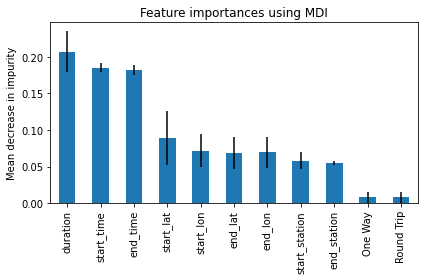

In [19]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 3.2.- Moddel save

In [20]:
import joblib
import gzip

In [21]:
# Export model
joblib.dump(final_model, gzip.open('model_binary.dat.gz', "wb"))